# Exercise 16: Creating a Static Line Plot
In this exercise, we will create a scatter plot for a different pair of features, *model_year* and *mpg*. Then, we'll generate a line plot based on those discrete attributes – *model_year* and *mpg*

In [ ]:
import seaborn as sns
# load a seaborn dataset
mpg_df = sns.load_dataset("mpg")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


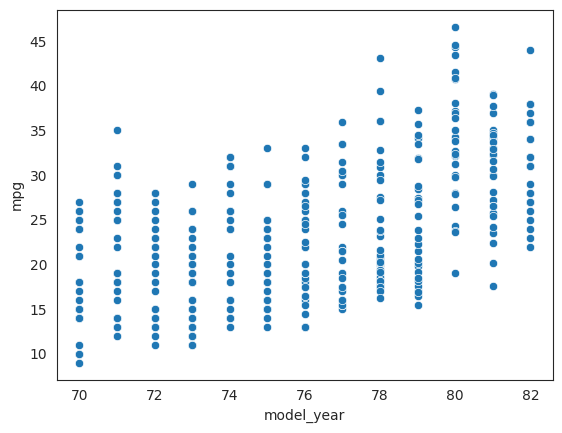

In [ ]:
# Create 2-D scatter plot 
ax1 = sns.scatterplot(x = "model_year", y = "mpg", data = mpg_df)

In this example, we see that the *model_year* feature only takes discrete values between 70 and 82. Now, when we have a discrete numerical feature like this (model_year), drawing a line plot joining the data points is a good idea. 

We can draw a simple line plot showing the relationship between model_year and 
mileage with the following code.

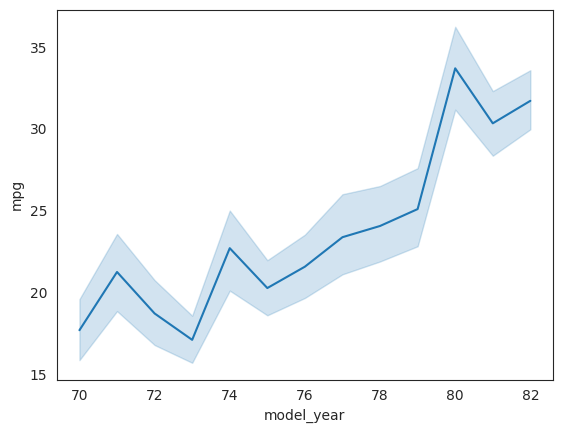

In [ ]:
# Draw a simple line plot to show the relationship between model_year and mileage:

ax = sns.lineplot(x="model_year", y="mpg", data=mpg_df)

As we can see, the points connected by the solid line represent the mean of the *y* axis feature at the corresponding x coordinate. The shaded area around the line plot shows the confidence interval for the *y* axis feature (by default, seaborn sets this to a 95% confidence interval). 

The *ci* parameter can be used to change to a different confidence interval.  An example of changing to a confidence interval of 68% is shown in the code that follows.


<Axes: xlabel='model_year', ylabel='mpg'>

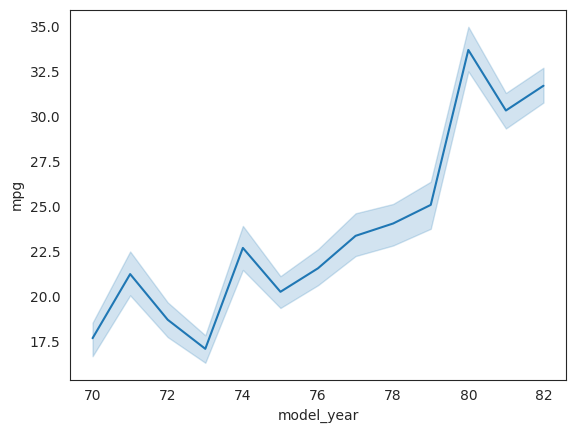

In [ ]:
sns.lineplot(x="model_year", y="mpg", data=mpg_df, errorbar=('ci', 68))

Line plots are great visualization techniques for scenarios where we have data that changes over time – the *x* axis could represent date or time, and the plot would help to visualize how a value varies over that period.

Speaking of presenting data across time using line plots, let's consider the example of the flights dataset from seaborn. The dataset is used to study a comparison between airlines, delay distribution, predicting flight delays, and more. Through the following example, we'll see how to generate line plots to represent this dataset.


# Exercise 17: Presenting Data across Time with multiple Line Plots
In this example, we'll see how to present data across time with multiple line plots. We are using the flights dataset:

In [ ]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Suppose you want to look at how the number of passengers varies between 
months in different years. How would you display this information?

One option is to draw multiple line plots in a single figure. For example, let's look at the line plots for the months of December and January across different years. 

We can do this with the code that follows.


<Axes: xlabel='year', ylabel='passengers'>

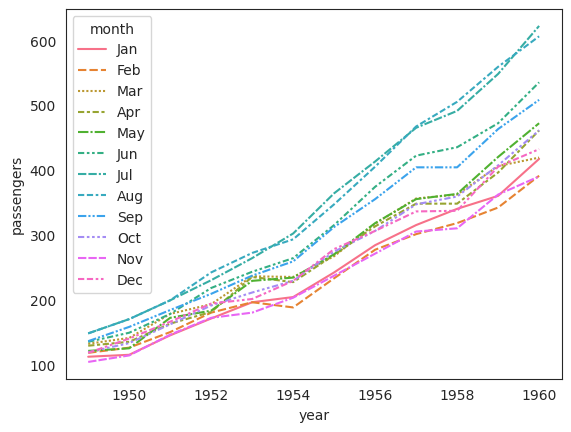

In [ ]:
sns.lineplot(x="year", y="passengers", data=flights_df, hue="month", style="month")

With this example of 12 line plots, we can see how a figure with too many line plots quickly begins to get crowded and confusing. Thus, for certain scenarios, line plots are neither appealing nor useful.

So, what is the alternative for our use case?

# Exercise 18: Creating and Exploring a Static Heatmap
A **heatmap** is a visual representation of a specific continuous numerical feature as a function of two other discrete features (either a categorical or a discrete numerical) in the dataset. 

The information is presented in grid form – each cell in the grid corresponds to a specific pair of values taken by the two discrete features and is colored based on the value of the third numerical feature. 

A **heatmap** is a great tool to visualize high-dimensional data and even to tease out features that are particularly variable across different classes

In this exercise, we will explore and create a **heatmap**. We will use the ***flights*** dataset from the ***seaborn*** library to generate a heatmap depicting the number of passengers per month across the years 1949-1960.

Now we need to *pivot* the dataset on the required variables using the *pivot()*
function before generating the heatmap. The *pivot* function first takes as 
arguments the feature that will be displayed in rows, then the one displayed in 
columns, and finally the feature whose variation we are interested in observing. It uses unique values from specified indexes/columns to form axes of the resulting DataFrame:

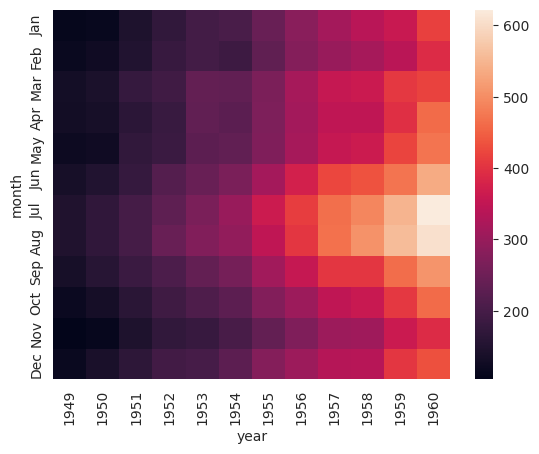

In [ ]:
df_pivoted = flights_df.pivot("month", "year", "passengers")
ax = sns.heatmap(df_pivoted)

Here, we can note that the total number of yearly flights increased steadily from 1949 to 1960. Moreover, the months of July and August seem to have the largest number of flights (compared to other months) across the years in observation. 
Now, that's an interesting trend to find from a simple visualization!
Plotting heatmaps is a very fun thing to explore, and there are lots of options 
available to tweak the parameters.

Rows or columns in a heatmap **can** also **be clustered** based on the extent of their similarity. To do this in *seaborn*, use the *clustermap* option.

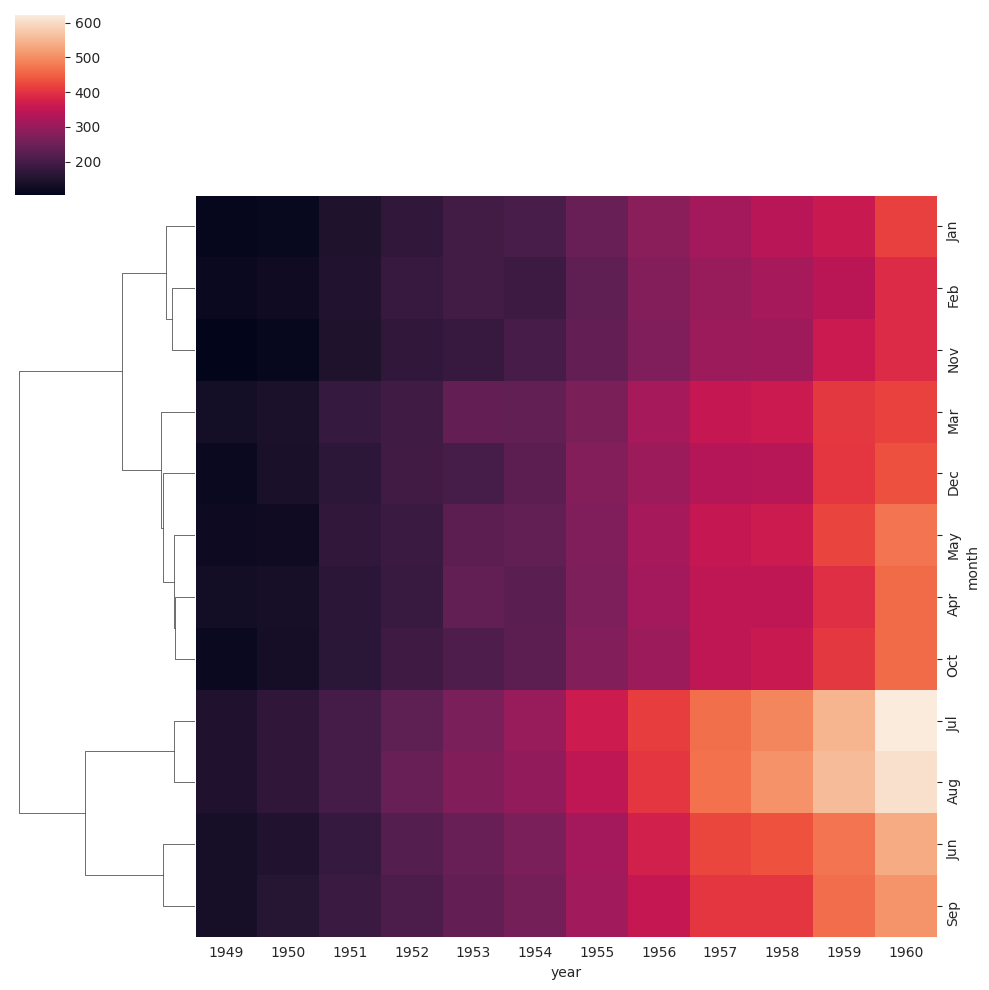

In [ ]:
ax = sns.clustermap(df_pivoted, col_cluster=False, row_cluster=True)

Did you notice how the order of months got rearranged in the plots but some months (for example, July and August) stuck together because of their similar trends? 
In both July and August, the number of flights increased relatively more drastically in the last few years till 1960.

We can cluster the data by year by switching the parameter values (row_
cluster=False, col_cluster=True) or cluster both by row and column 
(row_cluster=True, col_cluster=True).

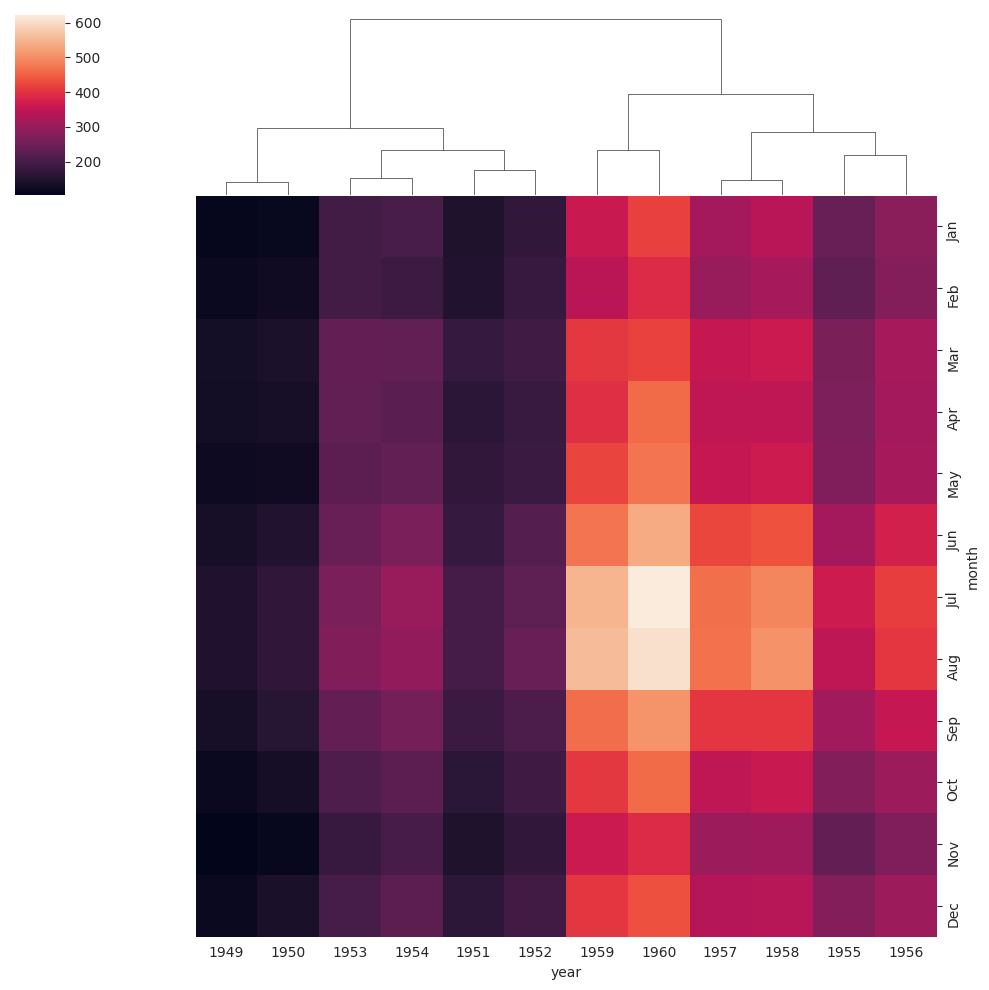

In [ ]:
ax = sns.clustermap(df_pivoted, col_cluster=True, row_cluster=False)

At this point, you may be thinking, But *wait*, *how* is the similarity between rows and columns computed? The answer is that it depends on the **distance metric** – that is, how the distance between two rows or two columns is computed. 
The rows/columns with the least distance between them are clustered closer 
together than the ones with a greater distance between them. The user can set 
the distance metric to one of the many available options (**manhattan**, **euclidean**, **correlation**, and others) simply using the metric option. 

*Seaborn* sets the metric to **euclidean by default**.

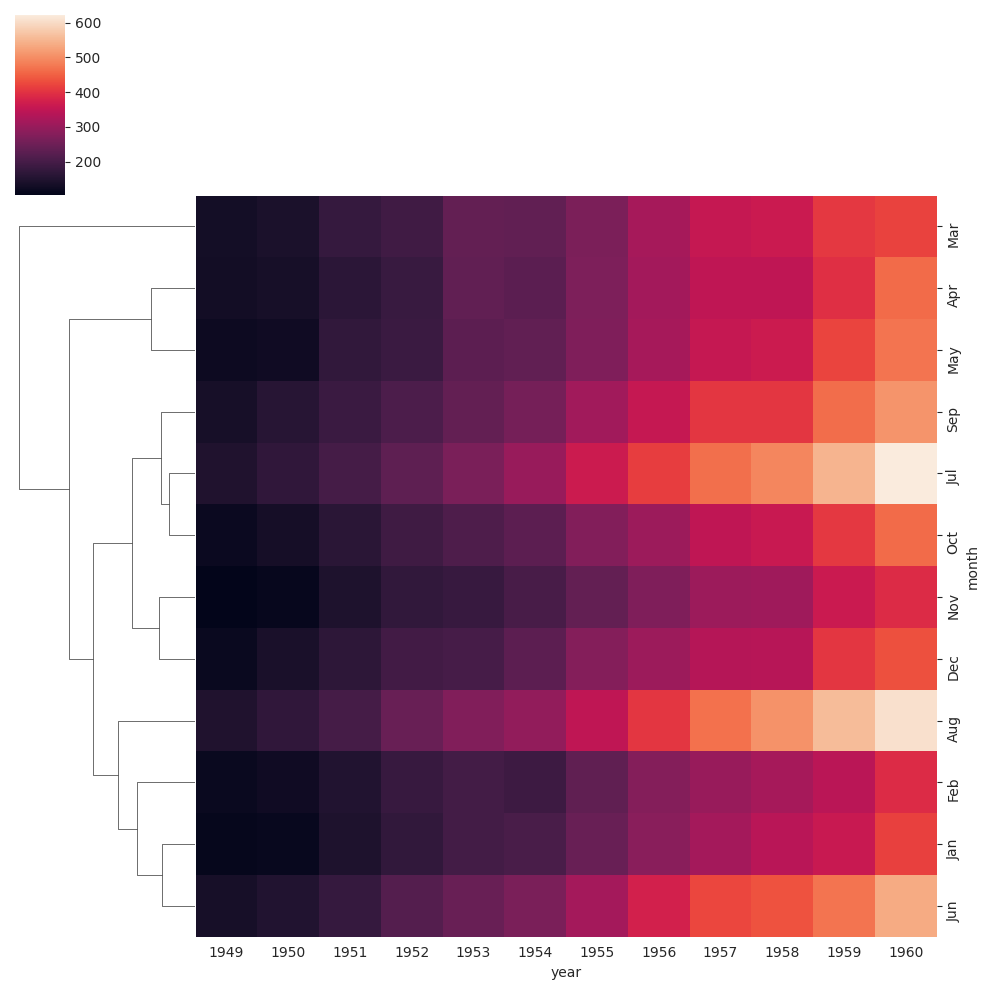

In [ ]:
# Change metric to correlation:
ax = sns.clustermap(df_pivoted, col_cluster=False, row_cluster=True, metric='correlation')

# **The Concept of Linkage in Heatmaps**
The clustering seen in heatmaps is called **agglomerative hierarchical clustering** because it involves the sequential grouping of rows/columns until all of them belong to a single cluster, resulting in a hierarchy. 

Without loss of generality, let's assume we are clustering rows. 

The first step in hierarchical clustering is to compute the distance between all possible pairs of rows, and to select two rows, say, A and B, with the least distance between them. Once these rows are grouped, they are said to be merged into a single cluster. Once this happens, we need a rule that not only determines the distance between two rows but also the distance between any two clusters (even if the cluster contains a single point):

*   If we define the distance between two clusters as the distance between the two points across the clusters closest to each other, the rule is called **single linkage**.
*   If the rule is to define the distance between two clusters as the distance between the points farthest from each other, it is called **complete linkage**.
*   If the rule is to define the distance as the average of all possible pairs of rows in the two clusters, it is called **average linkage**.

The same holds for clustering columns, too.

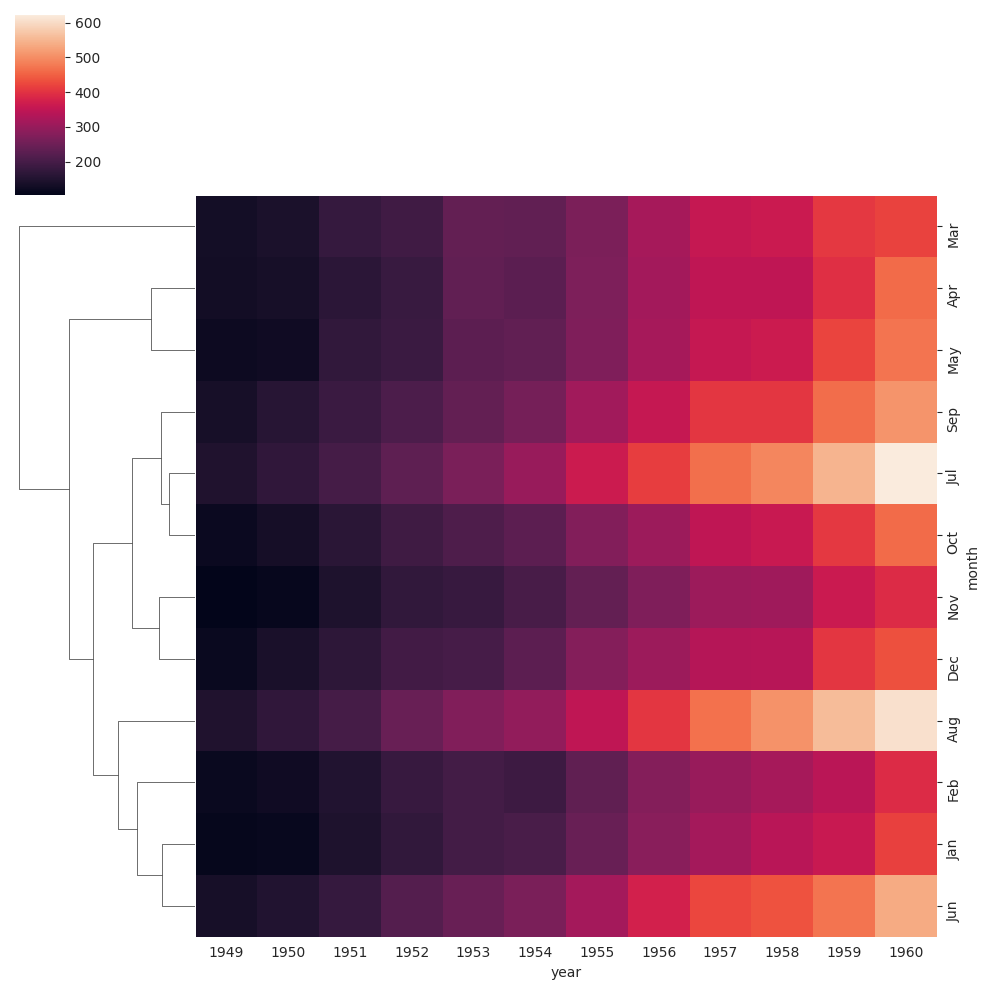

In [ ]:
# Link the heatmaps using the code that follows:
ax = sns.clustermap(df_pivoted, col_cluster=False, metric='correlation', method='average')

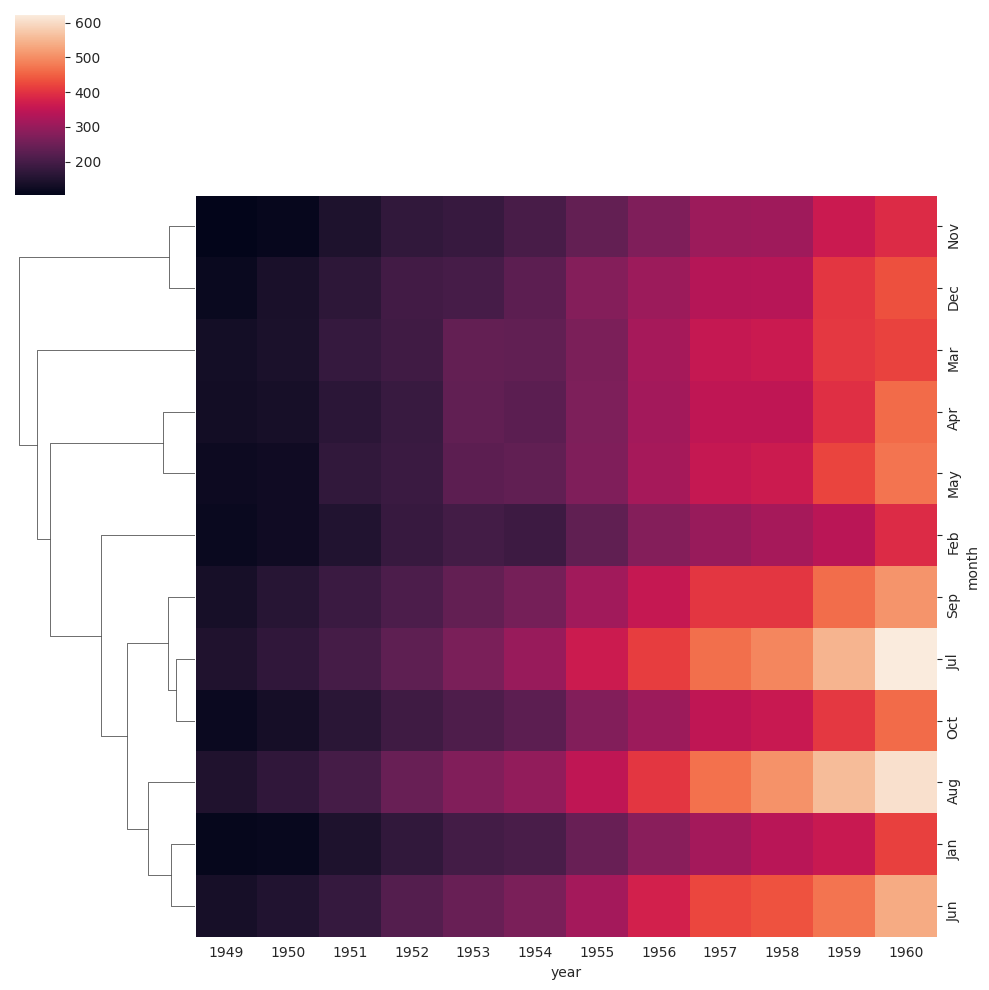

In [ ]:
ax = sns.clustermap(df_pivoted, col_cluster=False, metric='correlation', method='complete')

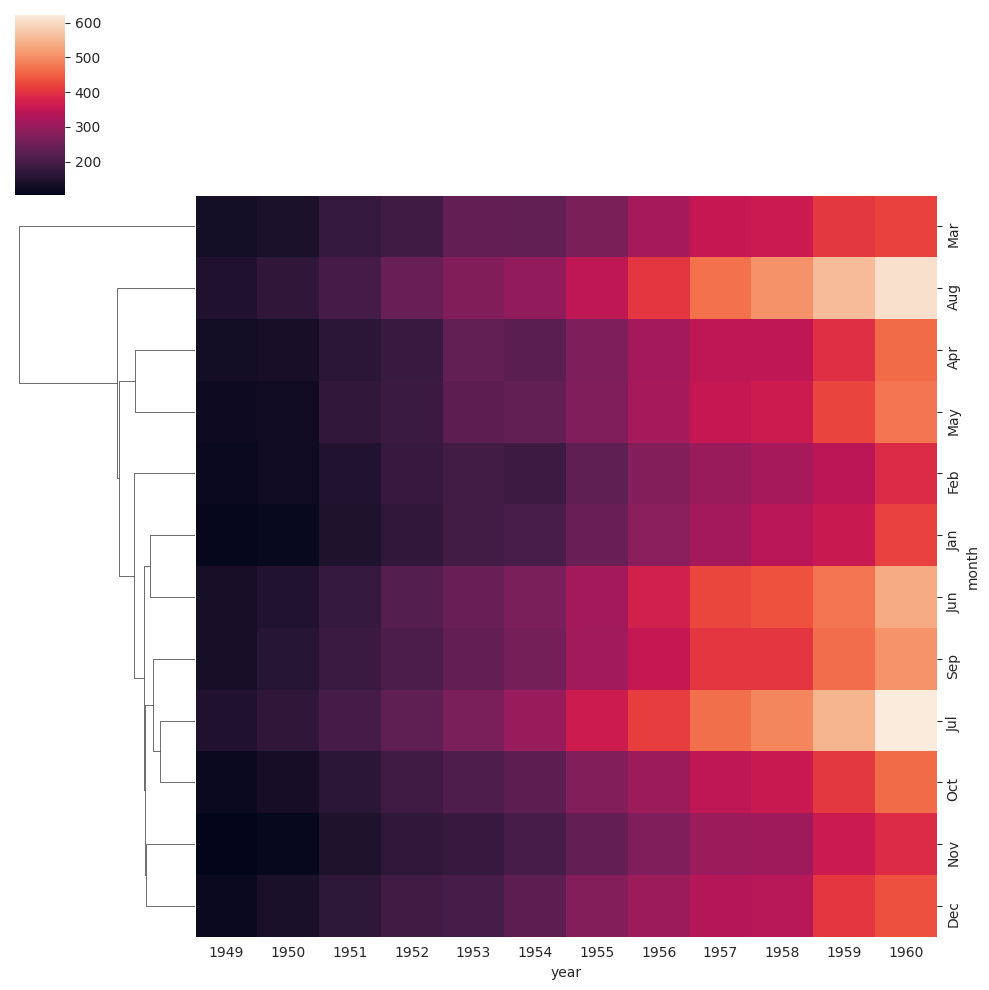

In [ ]:
ax = sns.clustermap(df_pivoted, col_cluster=False, metric='correlation', method='single')
